In [9]:
# Importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from matplotlib.animation import FuncAnimation
# import warnings
# warnings.filterwarnings("ignore")

Problem 1

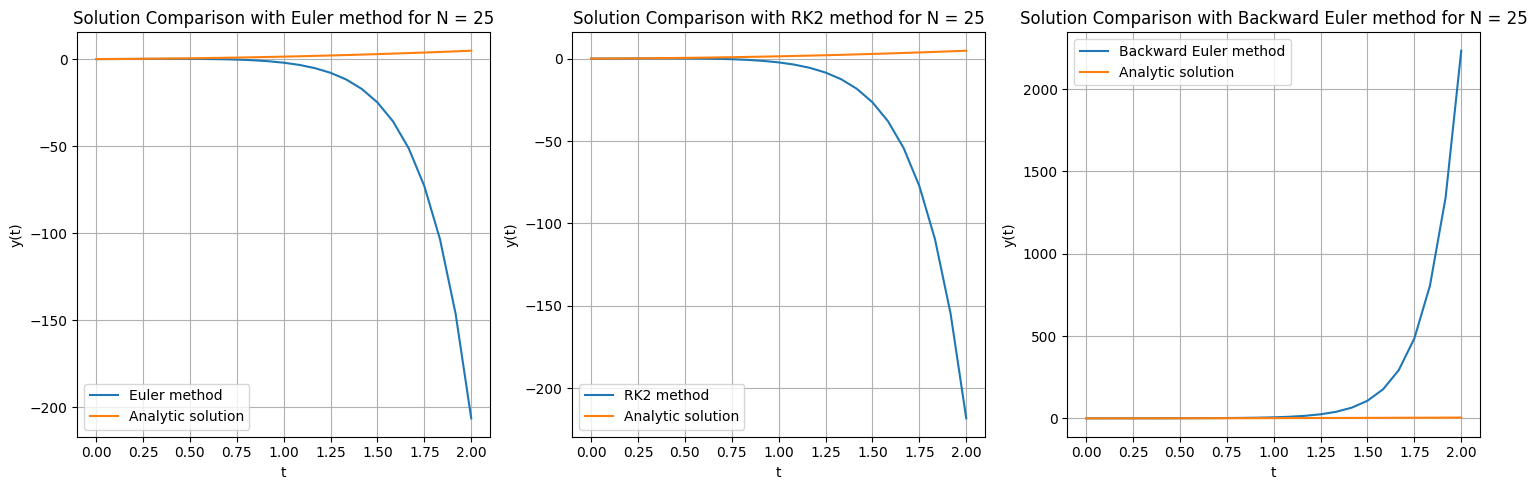

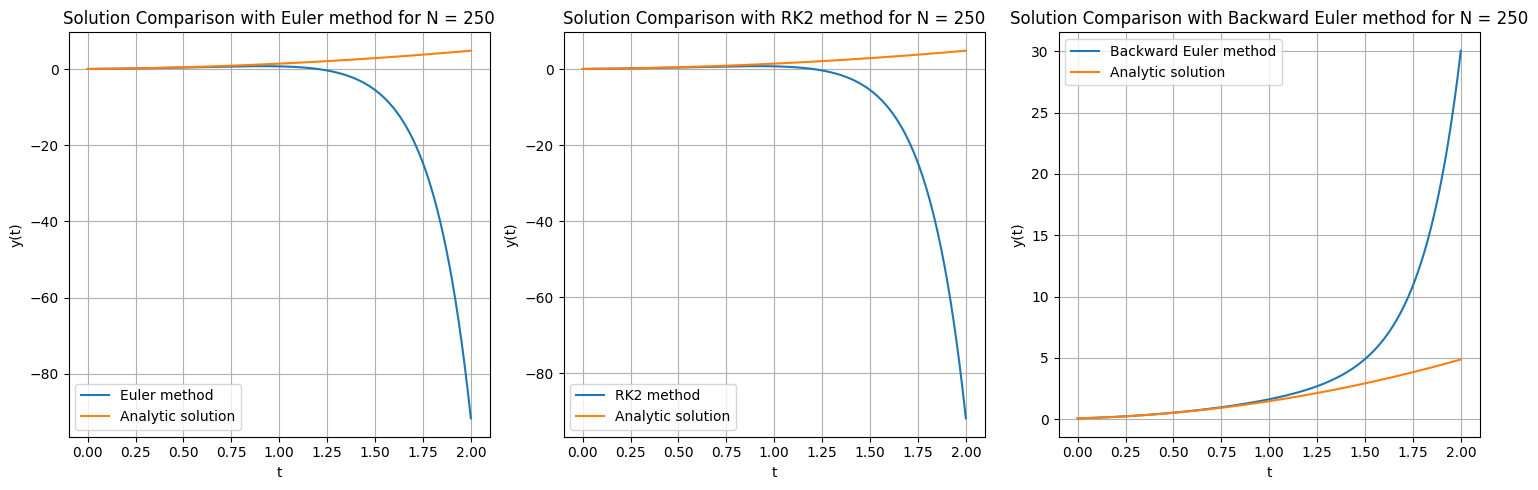

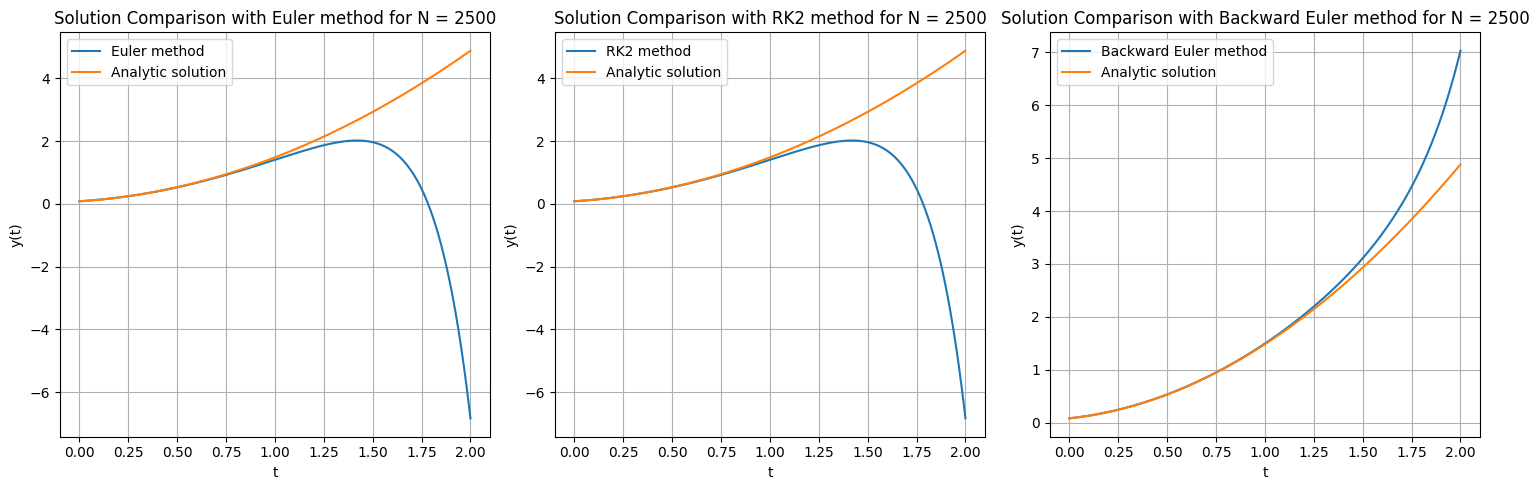

In [2]:
%matplotlib inline
# Defining number of steps and limits
a,b = 0.0,2.0
N = [25,250,2500]

for j in N:  
  # Defining parameters
  t_values = np.linspace(a,b,j)
  dt = (t_values[-1] - t_values[0])/j

  # Defining function which is on RHS of given differential equation.
  def f(t,y):
      return 5*y-5*t**2

  # Initial Condition
  y0 = 2/25

  # Making arrays for initial conditions for each process separately to append later and plot.
  y1 = [y0] # Euler Method.
  y2 = [y0] # RK-2 Method.
  y4 = [y0] # Backward Euler.

  # Initializing algorithms.
  for i in range(1,j):
      # Euler method.
      yy = y1[-1] + dt*f(t_values[i],y1[-1])
      # RK-2 method.
      k1 = f(t_values[i],y1[-1])*dt
      k2 = f(t_values[i] + dt,y1[-1]+k1)*dt
      c = y1[-1] + (k1 + k2)/2
      # Backward Euler.
      yyy = (y4[-1] - 5*dt*t_values[i]**2) / (1-5*dt)
      # Appending all values.
      y1.append(yy)
      y2.append(c)
      y4.append(yyy)

  # Defining variable for "Analytic solution".
  Y = t_values**2 + 2*t_values/5 + 2/25 # = odeint(f,y0,t_values)

  # Plotting all solutions for comparision.

  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # Subplot 1 - Euler method
  axs[0].plot(t_values, y1, label="Euler method")
  axs[0].plot(t_values, Y, label="Analytic solution")
  axs[0].set_title(f"Solution Comparison with Euler method for N = {j}")
  axs[0].set_xlabel("t")
  axs[0].set_ylabel("y(t)")
  axs[0].grid(True, which="both", ls="-")
  axs[0].legend()

  # Subplot 2 - RK2 method
  axs[1].plot(t_values, y2, label="RK2 method")
  axs[1].plot(t_values, Y, label="Analytic solution")
  axs[1].set_title(f"Solution Comparison with RK2 method for N = {j}")
  axs[1].set_xlabel("t")
  axs[1].set_ylabel("y(t)")
  axs[1].grid(True, which="both", ls="-")
  axs[1].legend()

  # Subplot 3 - Backward Euler method
  axs[2].plot(t_values, y4, label="Backward Euler method")
  axs[2].plot(t_values, Y, label="Analytic solution")
  axs[2].set_title(f"Solution Comparison with Backward Euler method for N = {j}")
  axs[2].set_xlabel("t")
  axs[2].set_ylabel("y(t)")
  axs[2].grid(True, which="both", ls="-")
  axs[2].legend()

  plt.tight_layout()
  plt.show()

Problem 2

Part A


MASTER CODE

In [10]:
def solve_advection_equation(method_type,c,nt):

     # Doc-string of the function.
    """
    Solves one-dimensional advection equation for Gaussian with specified method type, advection velocity and time step.

    Parameters: 
    method_type: Uses inbuilt methods given in function (Upwind, FCTS, Lax, Lax-Wanderoff, MacCormack).
    c: Advection velocity with specified direction in direction.
    nt: Controls time interval

    Returns:
    Returns animation showing 1-D advection equation.

    Example:
    >>> solve_advection_equation("Upwind",3,1000)
    output: Gives plot of 1-D advection equation of gaussian showing animation.
   
    """

    %matplotlib tk

    # Defining parameters
    a, b = -10, 10
    nx = 200
    x = np.linspace(a, b, nx)
    dx = (x[-1] - x[0]) / nx  
    t = np.linspace(0, 10, nt)
    dt = (t[-1] - t[0]) / nt

    # Defining gaussian as initial function
    u0 = np.exp(-(x)**2) / np.sqrt(2*np.pi)

    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")

    # Condition for Plotting initial plot.
    if method_type == "Upwind":
        ax.set_title(f"1D Advection Equation using Upwind scheme at convective speed = {c}")
    elif method_type == "FCTS":
        ax.set_title(f"1D Advection Equation using FCTS scheme at convective speed = {c}")
    elif method_type == "Lax":
        ax.set_title(f"1D Advection Equation using Lax scheme at convective speed = {c}")
    elif method_type == "LaxW":                                                                     # Unstable for nt = 10,100; stable for nt=10000.
        ax.set_title(f"1D Advection Equation using Lax-Wendroff scheme at speed = {c}")
    elif method_type == "MacC":
        ax.set_title(f"1D Advection Equation using MacCormack scheme at speed = {c}")
    else:
        raise ValueError(f"Invalid method type: {method_type}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    def upwind(frame):
        un = u.copy()

        # Directionaly sensitive and hence if condition.
        if c>0:
            for i in range(nx):
                u[i] = un[i] - c* dt / dx * (un[i % nx] - un[(i - 1) % nx])
        else:
            for i in range(nx):
                u[i] = un[i] - c* dt / dx * (un[(i+1) % nx] - un[i % nx])

    def fcts(frame):
        un = u.copy()
        for i in range(nx):
            u[i] = un[i] - c * (dt / (2 * dx)) * (un[(i + 1) % nx] - un[(i - 1) % nx])

    def lax(frame):
        un = u.copy()
        for i in range(nx):
            u[i] = (un[(i - 1) % nx] + un[(i + 1) % nx]) / 2 - c * (dt / (2 * dx)) * (un[(i + 1) % nx] - un[(i - 1) % nx])

    def laxw(frame):
        un = u.copy()
        for i in range(nx):
            u[i] = un[i] - c * (dt / (2 * dx)) * (un[(i + 1) % nx] - un[(i - 1) % nx]) + (c ** 2 * dt ** 2 / (2 * dx ** 2)) * (un[(i + 1) % nx] - 2 * un[i] + un[(i - 1) % nx])

    def macc(frame):
        un = u.copy()
        u_p = u.copy()
        for i in range(nx):

            # This has upwind and thus directional sensitive.
            if c > 0:
                u_p[i] = un[i] - c * (dt / dx) * (un[(i) % nx] - un[(i - 1) % nx])  # Predictor step.
            else:
                u_p[i] = un[i] - c * (dt / dx) * (un[(i + 1) % nx] - un[i])          
        for i in range(nx):
            if c > 0:
                u[i] = 0.5 * (un[i] + u_p[i]) - c * dt / dx * (u_p[i] - u_p[(i - 1) % nx])      # Corrector step.
            else:
                u[i] = 0.5 * (un[i] + u_p[i]) - c * dt / dx * (u_p[(i + 1) % nx] - u_p[(i) % nx]) 

    # Condition for using particular scheme.
    if method_type == "Upwind":
        scheme_function = upwind
    elif method_type == "FCTS":
        scheme_function = fcts
    elif method_type == "Lax":
        scheme_function = lax
    elif method_type == "LaxW":
        scheme_function = laxw
    elif method_type == "MacC":
        scheme_function = macc
    else:
        raise ValueError(f"Invalid method type: {method_type}")

    def animate(frame):
        scheme_function(frame)
        line.set_ydata(u)
        return line

    anim = FuncAnimation(fig, animate, frames=nt, interval=50)
    return anim 

In [15]:
# Example for one of the schemes.
solve_advection_equation("LaxW",3,1000)

Part B

In [16]:
# Solving advection equation for top hat function using finite difference method with periodic boundary conditions
def MacC_Top(c,nt):
    %matplotlib tk
    # Defining parameters
    nx = 200
    x = np.linspace(-10, 10, nx)
    t = np.linspace(0, 25,nt)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    
    # Defining top-hat as initial function
    pulse_height = 1.0
    pulse_width = 10.0
    u0 = np.where((np.abs(x) <= pulse_width / 2), pulse_height, 0)


    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")
    ax.set_title(f"1D Advection Equation using MacCormack scheme at speed = {c}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    # Defining function that does the plotting
    def macc(frame):

        # Creating two copies for prdector step and Corrector step
        un = u.copy()
        u_p = u.copy()

        #Same as upwind so the condition applies here
        for i in range(nx):

            # This has upwind and thus directional sensitive.
            if c > 0:
                u_p[i] = un[i] - c * (dt / dx) * (un[(i) % nx] - un[(i - 1) % nx])  # Predictor step.
            else:
                u_p[i] = un[i] - c * (dt / dx) * (un[(i + 1) % nx] - un[i])          
        for i in range(nx):
            if c > 0:
                u[i] = 0.5 * (un[i] + u_p[i]) - c * dt / dx * (u_p[i] - u_p[(i - 1) % nx])      # Corrector step.
            else:
                u[i] = 0.5 * (un[i] + u_p[i]) - c * dt / dx * (u_p[(i + 1) % nx] - u_p[(i) % nx]) 

        # Update the plot with the new solution
        line.set_ydata(u)
        return line

    # Create animation
    anim = FuncAnimation(fig, macc, frames=nt, interval=50)

    # Show the animation
    return anim  


In [20]:
# Call the function to generate the animation
MacC_Top(3,1000)

Piece-wise Schemes:

Upwind Scheme

In [12]:
# Solving advection equation using finite difference method with periodic boundary conditions
def Upwind(c):
    %matplotlib tk

    # Defining parameters
    a, b = -10, 10
    nx = 200
    x = np.linspace(a, b, nx)
    dx = (x[-1] - x[0]) / nx
    nt = 10000
    t = np.linspace(0, 25, nt)
    dt = (t[-1] - t[0]) / nt

    # Defining gaussian as initial function
    u0 = np.exp(-(x) ** 2) / np.sqrt(2 * np.pi)

    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")
    ax.set_title(f"1D Advection Equation using Upwind scheme at convective speed = {c}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    # Defining function that does the plotting
    def upwind(frame):
        un = u.copy()

        # Different direction specific scheme
        if c > 0:
            for i in range(nx):
                u[i] = un[i] - c * dt / dx * (un[i % nx] - un[(i - 1) % nx])
        else:
            for i in range(nx):
                u[i] = un[i] - c * dt / dx * (un[(i + 1) % nx] - un[i % nx])

        # Update the plot with the new solution
        line.set_ydata(u)
        return line

    # Create animation
    anim = FuncAnimation(fig, upwind, frames=nt, interval=50)

    # Show the animation
    return anim

# Call the function to generate the animation
Upwind(3)

(<matplotlib.animation.FuncAnimation at 0x258c792e830>, None)

FCTS Scheme

In [10]:
# Solving advection equation using finite difference method with periodic boundary conditions
def FCTS(c):
    %matplotlib tk

    # Defining parameters
    a, b = -10, 10
    nx = 200
    x = np.linspace(a, b, nx)
    dx = (x[-1] - x[0]) / nx
    nt = 1000
    t = np.linspace(0, 25, nt)
    dt = (t[-1] - t[0]) / nt
    lmda = [3, -3, 10]

    # Defining gaussian as initial function
    u0 = np.exp(-(x) ** 2) / np.sqrt(2 * np.pi)

    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")
    ax.set_title(f"1D Advection Equation using FCTS scheme at convective speed = {c}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    # Defining function that does the plotting
    def fcts(frame):
        un = u.copy()
        for i in range(nx):
            u[i] = un[i] - c * (dt / (2 * dx)) * (un[(i + 1) % nx] - un[(i - 1) % nx])

        # Update the plot with the new solution
        line.set_ydata(u)
        return line

    # Create animation
    anim = FuncAnimation(fig, fcts, frames=nt, interval=50)

    # Show the animation
    return anim

# Call the function to generate the animation
FCTS(3)

(<matplotlib.animation.FuncAnimation at 0x258cd892d70>, None)

Lax Scheme

In [16]:
# Solving advection equation using finite difference method with periodic boundary conditions
def Lax(c):
    %matplotlib tk

    # Defining parameters
    a, b = -10, 10
    nx = 200
    x = np.linspace(a, b, nx)
    dx = (x[-1] - x[0]) / nx
    nt = 1000
    t = np.linspace(0, 25, nt)
    dt = (t[-1] - t[0]) / nt
    lmda = [3, -3, 10]

    # Defining gaussian as initial function
    u0 = np.exp(-(x) ** 2) / np.sqrt(2 * np.pi)

    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")
    ax.set_title(f"1D Advection Equation using Lax scheme at convective speed = {c}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    # Defining function that does the plotting
    def lax(frame):
        un = u.copy()
        for i in range(nx):
            u[i] = (un[(i - 1) % nx] + un[(i + 1) % nx]) / 2 - c * (dt / (2 * dx)) * (un[(i + 1) % nx] - un[(i - 1) % nx])

        # Update the plot with the new solution
        line.set_ydata(u)
        return line

    # Create animation
    anim = FuncAnimation(fig, lax, frames=nt, interval=50)

    # Show the animation
    return anim

# Call the function to generate the animation
Lax(3)


(<matplotlib.animation.FuncAnimation at 0x258c7bb0910>, None)

Lax-Wanderoff Scheme

In [15]:
# Solving advection equation using finite difference method with periodic boundary conditions
def LaxW(c):
    %matplotlib tk

    # Defining parameters
    a, b = -10, 10
    nx = 200
    x = np.linspace(a, b, nx)
    dx = (x[-1] - x[0]) / nx
    nt = 1000                                               # Remains stable for this step and not for 10,100.
    t = np.linspace(0, 25, nt)
    dt = (t[-1] - t[0]) / nt
    lmda = [3, -3, 10]

    # Defining gaussian as initial function
    u0 = np.exp(-(x) ** 2) / np.sqrt(2 * np.pi)
    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")
    ax.set_title(f"1D Advection Equation using Lax-Wendroff scheme at speed = {c}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    # Defining function that does the plotting
    def laxw(frame):
        un = u.copy()
        for i in range(nx):
            u[i] = un[i] - c * (dt / (2 * dx)) * (un[(i + 1) % nx] - un[(i - 1) % nx]) + (c ** 2 * dt ** 2 / (2 * dx ** 2)) * (un[(i + 1) % nx] - 2 * un[i] + un[(i - 1) % nx])

        # Update the plot with the new solution
        line.set_ydata(u)
        return line

    # Create animation
    anim = FuncAnimation(fig, laxw, frames=nt, interval=50)

    # Show the animation
    return anim

# Call the function to generate the animation
LaxW(3)


(<matplotlib.animation.FuncAnimation at 0x258c7f3fa30>, None)

MacCormack Scheme

In [54]:
# Solving advection equation using finite difference method with periodic boundary conditions
def MacC(c):
    %matplotlib tk
    # Defining parameters
    a, b = -10, 10
    nx = 200
    x = np.linspace(a, b, nx)
    dx = (x[-1] - x[0]) / nx
    nt = 1000
    t = np.linspace(0, 10, nt)
    dt = (t[-1] - t[0]) / nt
    lmda = [3, -3, 10]

    # Defining gaussian as initial function
    u0 = np.exp(-(x) ** 2) / np.sqrt(2 * np.pi)
    # Plotting initial condition
    fig, ax = plt.subplots()
    line = ax.plot(x, u0, label="Initial Condition")[0]
    ax.set_xlabel("x")
    ax.set_ylabel("Function")
    ax.set_title(f"1D Advection Equation using MacCormack scheme at speed = {c}")

    # Copying the initial conditions for the array size and later updating them based on the function
    u = u0.copy()

    # Defining function that does the plotting
    def macc(frame):

        # Creating two copies for prdector step and Corrector step
        un = u.copy()
        u_p = u.copy()

        #Same as upwind so the condition applies here
        for i in range(nx):

            # This has upwind and thus directional sensitive.
            if c > 0:
                u_p[i] = un[i] - c * (dt / dx) * (un[(i) % nx] - un[(i - 1) % nx])  # Predictor step.
            else:
                u_p[i] = un[i] - c * (dt / dx) * (un[(i + 1) % nx] - un[i])          
        for i in range(nx):
            if c > 0:
                u[i] = 0.5 * (un[i] + u_p[i]) - c * dt / dx * (u_p[i] - u_p[(i - 1) % nx])      # Corrector step.
            else:
                u[i] = 0.5 * (un[i] + u_p[i]) - c * dt / dx * (u_p[(i + 1) % nx] - u_p[(i) % nx]) 

        # Update the plot with the new solution
        line.set_ydata(u)
        return line

    # Create animation
    anim = FuncAnimation(fig, macc, frames=nt, interval=50)

    # Show the animation
    return anim

# Call the function to generate the animation
MacC(-3)

(<matplotlib.animation.FuncAnimation at 0x2054cd25f60>, None)

Different algorithm?

In [9]:
def mac_Cormack_2(lamb,step_size):   #old code
    
    x = np.linspace(-10, 10, 200)
    t = np.linspace(0, 25,step_size)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    pulse_height = 3.0
    pulse_width = 8.0
    u_0 = np.where((np.abs(x) <= pulse_width / 2), pulse_height, 0)
    
    u_j = u_0.copy()  

    fig, ax = plt.subplots()
    line, = ax.plot(x, u_0,color = 'red')
    ax.set_xlabel("x")
    ax.set_ylabel("advection")    
    ax.set_title(f"Maccormak method, $\lambda $ =  {lamb}")

    def update(frame):
        un = u_j.copy()
        u_p = u_j.copy()
        for i in range(0,len(x)):

            #Same as upwind so the condition applies here
            if lamb > 0:
                u_p[i] = un[i] - lamb * (dt / dx) * (un[(i) % 200] - un[(i - 1) % 200])  # Predictor step.
            else:
                u_p[i] = un[i] + abs(lamb) * (dt / dx) * (un[(i + 1) % 200] - un[i])          
        for i in range(0,len(x)):
            if lamb > 0:
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[i] - u_p[(i - 1) % 200])      # Corrector step.
            else:
                u_j[i] = 0.5 * (un[i] + u_p[i]) - lamb * dt / dx * (u_p[(i + 1) % 200] - u_p[(i) % 200]) 

    
        line.set_ydata(u_j)
        #ax.set_ylim(np.min(u_j), np.max(u_j))

        return line,

    animation = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)
    return animation,plt.show()

In [10]:
# Calling the function
mac_Cormack_2(3.125,1000)

(<matplotlib.animation.FuncAnimation at 0x1c6f02a4250>, None)